<a href="https://colab.research.google.com/github/vicksypython/Retail-price-prediction-/blob/main/ML_Retail_price_prediction_capstone_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
###Rossmann operates over 3000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance: Store sales are influenced by many factors, including promotions, competition. school and state holidays. seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment

## vairable explanation
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

*  Store - **(nominal)** a unique ID for each store#
*  Sales - **(discrete)** the number of transactions recorded at the store that day
###Customers - **(discrete)** the number of customers on a given day
*  Open - **(nominal)** an indicator for whether the store was open: 0 = closed, 1 = open
*  StateHoliday - **(nominal)** indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*  SchoolHoliday - **(nominal)** indicates if the (Store, Date) was affected by the closure of public schools
*  StoreType - **(nominal)** differentiates between 4 different store models: a, b, c, d
*  Assortment - **(nominal)** describes an assortment level: a = basic, b = extra, c = extended
*  CompetitionDistance - **(continuous)** distance in meters to the nearest competitor store
*  CompetitionOpenSince[Month/Year] **(discrete)** gives the approximate year and month of the time the nearest competitor store was opened
*  Promo - **(nominal)** indicates whether a store is running a promo on that day
*  Promo2 - **(nominal)** Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*  Promo2Since[Year/Week] - **(discrete)** describes the year and calendar week when the store started participating in Promo2##
*  PromoInterval - **(ordinal)** describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store
*  DayOfWeek - **(ordinal)** Day of the week, using 1-7 for Monday - Sunday respectively
*  Date - **Date** in YYYY-MM-DD

*  UPT - **(continuous)** Units Per Transaction, a calculated measure of the average number of items sold per transaction on a given day at a given store

## code path

In [370]:
# Importing required to perform certain actions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [371]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [372]:
#Loading Rossman Dataset
rossman_ds= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets /ml rossamann dataset/Rossmann Stores Data.csv')


In [373]:
#Loading Store Dataset
store_ds = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets /ml rossamann dataset/store.csv")

In [374]:
store_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [375]:
rossman_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [376]:
store_ds.head(5)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [377]:
store_ds.tail()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [378]:
store_ds.shape

(1115, 10)

In [379]:
#give frist five rows
rossman_ds.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [380]:
#gives last five rows

rossman_ds.tail()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [381]:
rossman_ds.shape  

(1017209, 9)

In [382]:
#Summary Statastics
rossman_ds.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [383]:
#No. Of Stores in the Dataset
rossman_ds.Store.nunique()


1115

In [384]:
# Value_counts of StateHoliday Column
rossman_ds.StateHoliday.value_counts()


0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [385]:
print(rossman_ds['Date'].min(),'initial')
print(rossman_ds['Date'].max(),'final')


2013-01-01 initial
2015-07-31 final


In [386]:
# extract year, month, day and week,quarter of year from "Date"
#rossman_ds['Date'] = pd.to_datetime(rossman_ds['Date'], format="%Y-%m-%d", errors='raise')

rossman_ds['Date']=pd.to_datetime(rossman_ds['Date'],infer_datetime_format= True)
rossman_ds['Year'] = rossman_ds['Date'].apply(lambda x: x.year)
rossman_ds['Day'] = rossman_ds['Date'].apply(lambda x: x.day)
rossman_ds['Month'] = rossman_ds['Date'].apply(lambda x: x.month)
rossman_ds['quarter'] = rossman_ds['Date'].apply(lambda x:x.quarter)
rossman_ds['WeekOfYear'] = rossman_ds['Date'].apply(lambda x: x.weekofyear)


In [387]:
rossman_ds.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_ds.drop(columns= 'Date',axis =1,inplace = True)
rossman_ds.head(2)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Day,Month,quarter,WeekOfYear
0,1,5,5263,555,1,1,0,1,2015,31,7,3,31
1,2,5,6064,625,1,1,0,1,2015,31,7,3,31


In [388]:
store_ds.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [389]:
# duplicated values  and null values in data set
print('no of null values in rossman data is ',rossman_ds.isnull().sum())
print('no of null values in store data is',store_ds.isnull().sum())
print('no of duplicates present in rossman ',rossman_ds.duplicated().sum())
print('no of duplicates present in store data',store_ds.duplicated().sum())

no of null values in rossman data is  Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Day              0
Month            0
quarter          0
WeekOfYear       0
dtype: int64
no of null values in store data is Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
no of duplicates present in rossman  0
no of duplicates present in store data 0


In [390]:
#gives not null values in dataset
store_ds.notnull().sum()

Store                        1115
StoreType                    1115
Assortment                   1115
CompetitionDistance          1112
CompetitionOpenSinceMonth     761
CompetitionOpenSinceYear      761
Promo2                       1115
Promo2SinceWeek               571
Promo2SinceYear               571
PromoInterval                 571
dtype: int64

## Merging both data sets


In [ ]:
merged_ds = rossman_ds.merge(store_ds,on= ['Store'],how = 'inner')
print(merged_ds.shape)

(1017209, 22)


In [ ]:
merged_ds.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Day,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,31,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,30,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,29,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,28,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,27,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
merged_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   Year                       1017209 non-null  int64  
 9   Day                        1017209 non-null  int64  
 10  Month                      1017209 non-null  int64  
 11  quarter                    1017209 non-null  int64  
 12  WeekOfYear                 1017209 non-null  int64  
 13  StoreType   

In [ ]:
merged_ds.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Day,Month,quarter,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,1.570279e+01,5.846762e+00,2.294252e+00,2.361551e+01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,8.787638e+00,3.326097e+00,1.081850e+00,1.443338e+01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,8.000000e+00,3.000000e+00,1.000000e+00,1.100000e+01,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,1.600000e+01,6.000000e+00,2.000000e+00,2.200000e+01,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,2.300000e+01,8.000000e+00,3.000000e+00,3.500000e+01,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,3.100000e+01,1.200000e+01,4.000000e+00,5.200000e+01,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
merged_ds["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [ ]:
print("Distinct number of Stores :", len(merged_ds["Store"].unique()))
print("Distinct number of Days :", len(merged_ds["Day"].unique()))
print("Average daily sales of all stores : ",round(merged_ds["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 31
Average daily sales of all stores :  5773.82


## E.D.A


### Transformations

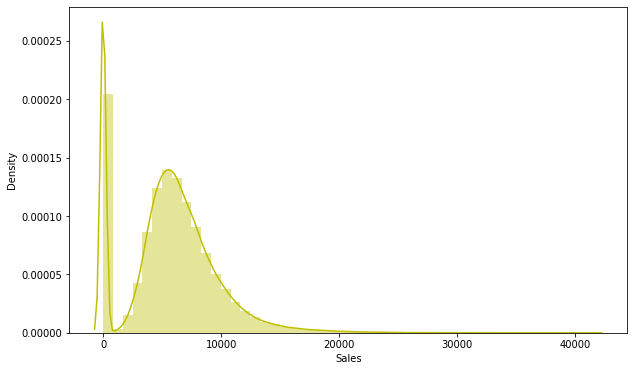

In [ ]:
# Dependent variable price
plt.figure(figsize= (10,6))
sns.distplot(merged_ds['Sales'],color= 'y')

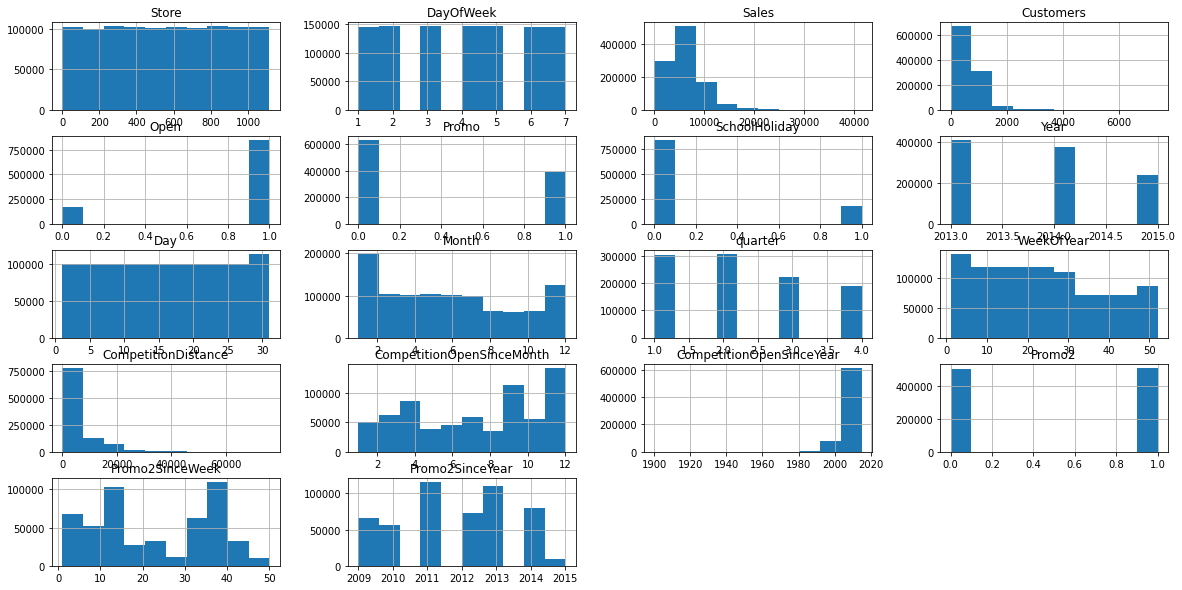

In [ ]:
merged_ds.hist(figsize =(20,10))
plt.show()

In [ ]:
numerical_features = merged_ds.describe()


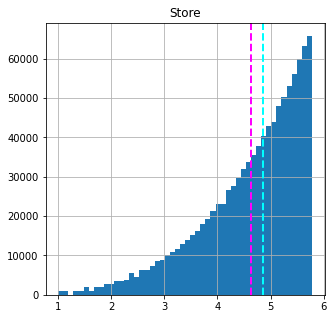

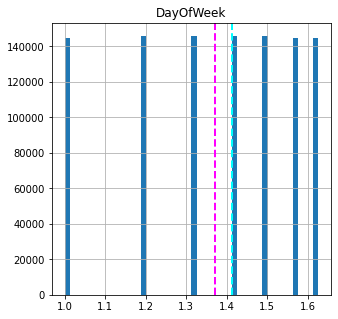

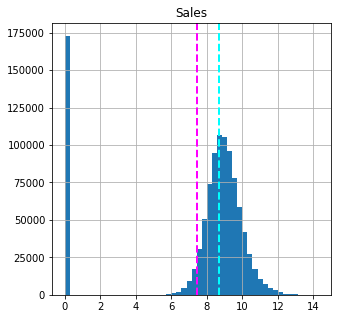

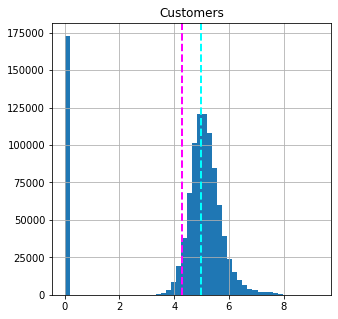

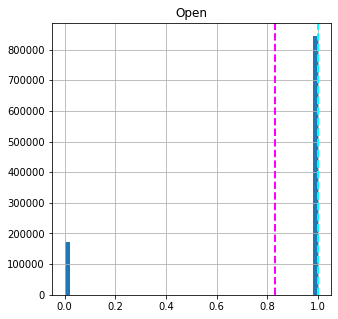

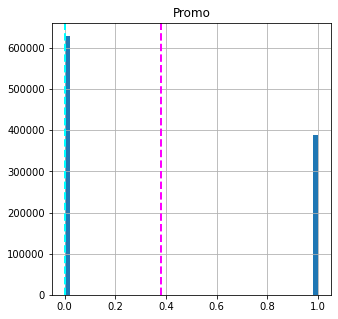

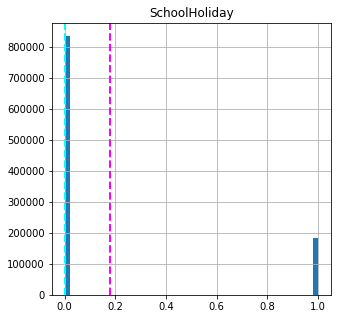

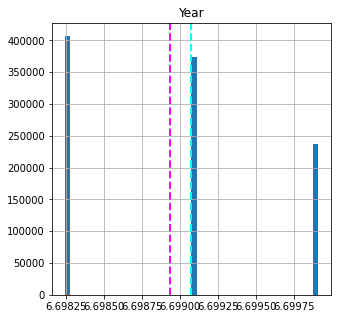

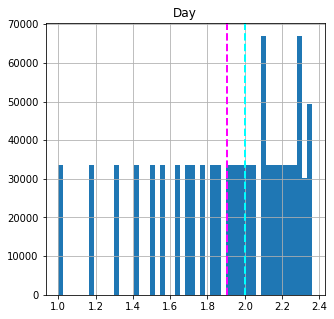

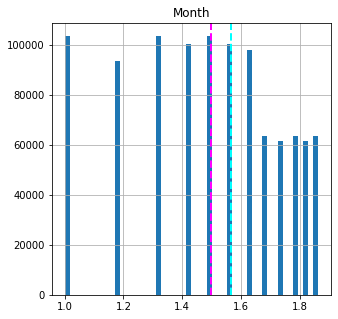

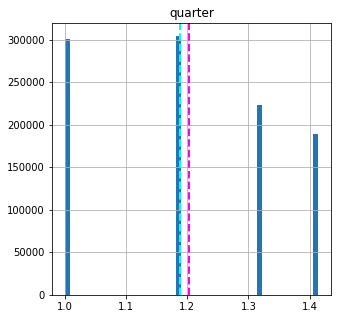

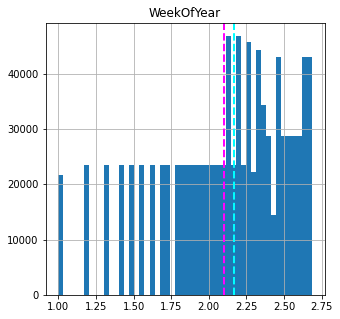

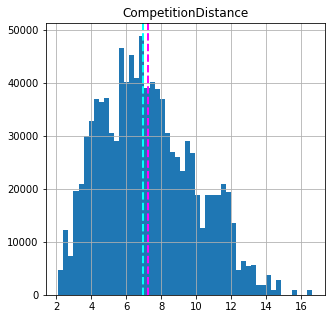

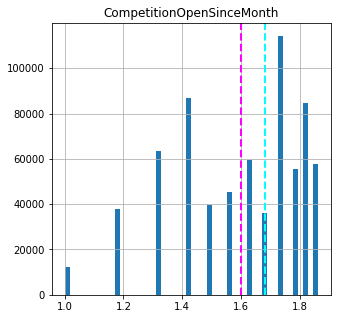

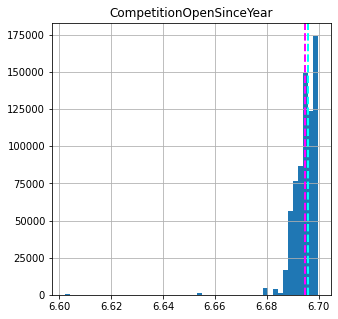

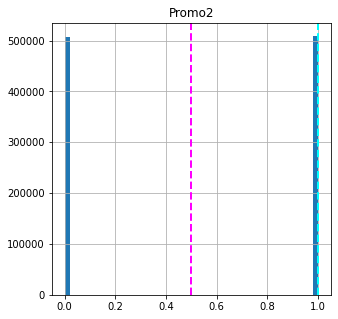

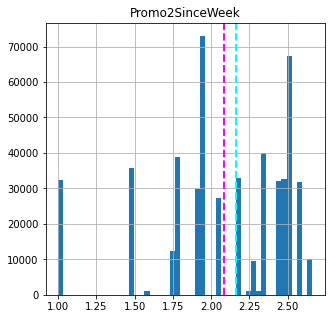

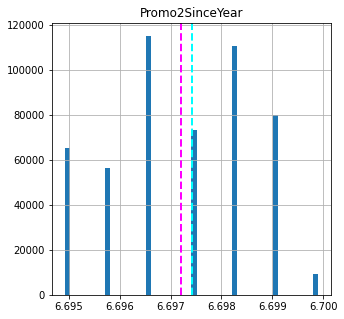

In [ ]:
#For Left Skewed data....
#Plot a bar plot for each numerical feature  count
for col in numerical_features:
  fig = plt.figure(figsize = (5,5))
  ax = fig.gca()
  features = np.sqrt(np.sqrt(merged_ds[col]))
  features.hist(bins=50,ax=ax)
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth =2)
  ax.axvline(features.median(),color ='cyan',linestyle = 'dashed',linewidth =2)
  ax.set_title(col)
plt.show()

###Missing Values


In [ ]:
for i in merged_ds.columns:
    print("Missing values in ",i, "is -",  "    "  ,merged_ds[i].isnull().sum()/merged_ds.shape[0] * 100)

Missing values in  Store is -      0.0
Missing values in  DayOfWeek is -      0.0
Missing values in  Sales is -      0.0
Missing values in  Customers is -      0.0
Missing values in  Open is -      0.0
Missing values in  Promo is -      0.0
Missing values in  StateHoliday is -      0.0
Missing values in  SchoolHoliday is -      0.0
Missing values in  Year is -      0.0
Missing values in  Day is -      0.0
Missing values in  Month is -      0.0
Missing values in  quarter is -      0.0
Missing values in  WeekOfYear is -      0.0
Missing values in  StoreType is -      0.0
Missing values in  Assortment is -      0.0
Missing values in  CompetitionDistance is -      0.25973030124586
Missing values in  CompetitionOpenSinceMonth is -      31.787764363075826
Missing values in  CompetitionOpenSinceYear is -      31.787764363075826
Missing values in  Promo2 is -      0.0
Missing values in  Promo2SinceWeek is -      49.94362023930186
Missing values in  Promo2SinceYear is -      49.94362023930186
M

In [ ]:
# Removing null values columns  in store dataset
merged_ds.drop(columns=['Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis= 1, inplace=True)


In [ ]:
#replacing null values with mean value 
merged_ds['CompetitionOpenSinceMonth'].fillna(int(merged_ds['CompetitionOpenSinceMonth'].mean()),inplace =True)
merged_ds['CompetitionOpenSinceYear'].fillna(int(merged_ds['CompetitionOpenSinceYear'].mean()),inplace= True)
merged_ds['CompetitionDistance'].fillna(int(merged_ds['CompetitionDistance'].mean()),inplace =True)

In [ ]:
#FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
merged_ds["Season"] = np.where(merged_ds["Month"].isin([3,4,5]),"Spring",
                      np.where(merged_ds["Month"].isin([6,7,8]),"Summer",
                      np.where(merged_ds["Month"].isin([9,10,11]), "Fall",
                      np.where(merged_ds["Month"].isin([12,1,2]),"Winter","None"))))
merged_ds.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Day,Month,quarter,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Season
0,1,5,5263,555,1,1,0,1,2015,31,7,3,31,c,a,1270.0,9.0,2008.0,0,Summer
1,1,4,5020,546,1,1,0,1,2015,30,7,3,31,c,a,1270.0,9.0,2008.0,0,Summer
2,1,3,4782,523,1,1,0,1,2015,29,7,3,31,c,a,1270.0,9.0,2008.0,0,Summer
3,1,2,5011,560,1,1,0,1,2015,28,7,3,31,c,a,1270.0,9.0,2008.0,0,Summer
4,1,1,6102,612,1,1,0,1,2015,27,7,3,31,c,a,1270.0,9.0,2008.0,0,Summer


### understanding catagorical **features**

In [ ]:
#ploting barplot of season with respective sales 
ax = sns.barplot(x ='Season',y='Sales',data = merged_ds)

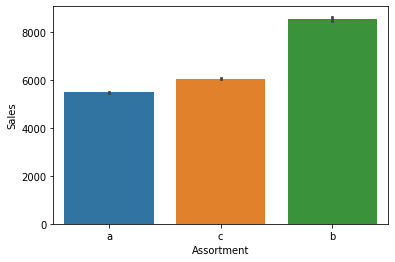

In [368]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data = merged_ds)

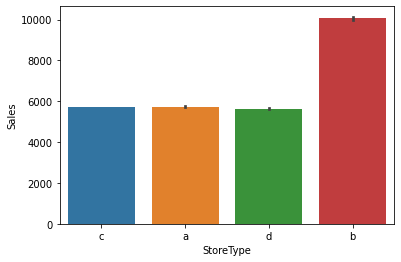

In [369]:
#Create the bar plot for Average Sales across different Store Types
ax =sns.barplot(x= 'StoreType',y = 'Sales',data = merged_ds)